In [104]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter


%matplotlib inline

#increase plot size
plt.rcParams['figure.figsize'] = [20, 10]

import numpy as np
# maximum print option
np.set_printoptions(linewidth=400)

from model import Schelling

yellow = (237, 215, 79)
yellow = tuple([val / 255 for val in yellow])  # Normalize to range [0, 1]

red = (177,39,28)
red = tuple([val / 255 for val in red])  # Normalize to range [0, 1]

In [105]:
model = Schelling(width = 25, height = 25, density = 0.80, minority_pc = 0.4, homophily = 3,  policy = 'random', follow_policy=1)


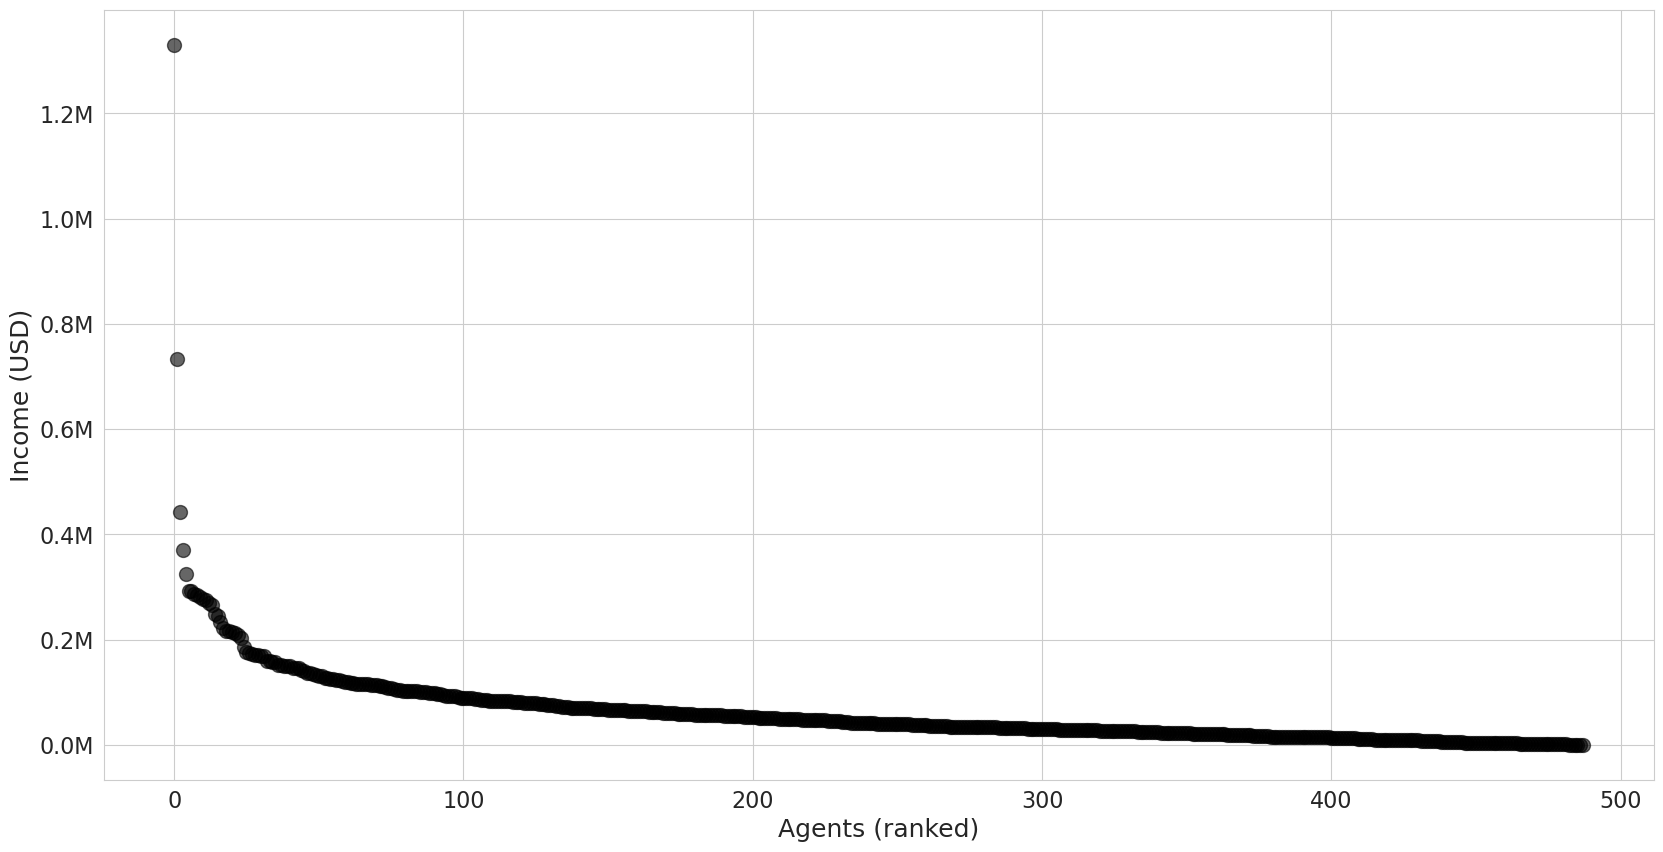

In [106]:

#plot an histogram of the incomes of the agents

incomes = [agent.income for agent in model.schedule.agents]


incomes = sorted(incomes, reverse=True)

def millions_formatter(x, pos):
    return f'{x / 1000000}M'

fig, ax = plt.subplots()
#plot a with points with
plt.plot(incomes, 'o', markersize=10, alpha=0.6, color='black')

plt.xlabel("Agents (ranked)", fontsize=18)
plt.ylabel("Income (USD)", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#loglog plot
#plt.loglog()

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))






<Axes: >

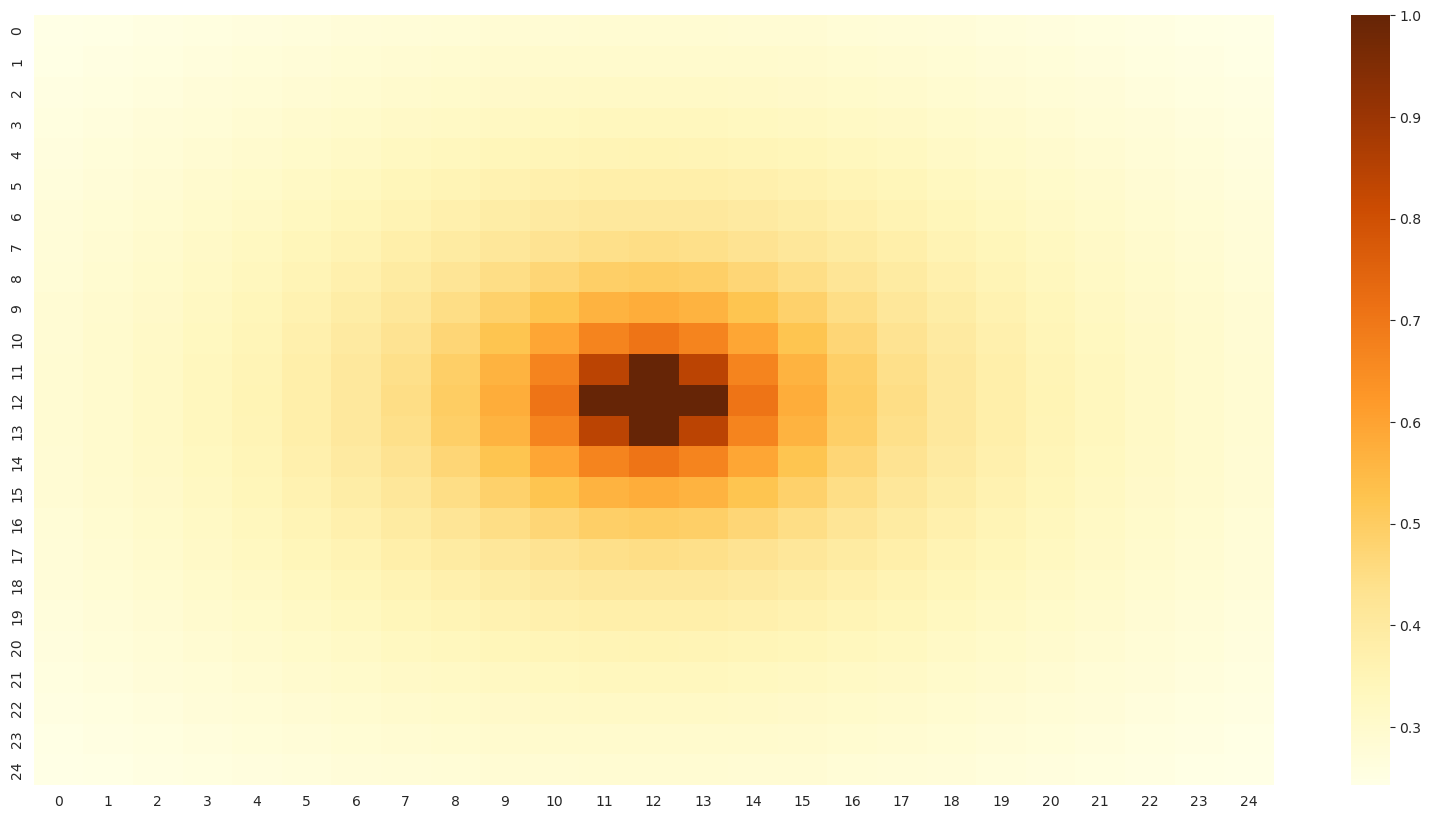

In [107]:
#with seaborn realize an heatmap of the relevance matrix
import seaborn as sns

sns.heatmap(model.relevance_matrix, cmap="YlOrBr")

In [108]:
while model.running and model.schedule.steps < 100:
    model.step()
print(model.schedule.steps)  # Show how many steps have actually run

start_occupancy = model.cell_occupancy_matrix_array[0]  #1 are minority, 0 are majority, -1 are empty
end_occupancy = model.cell_occupancy_matrix_array[model.schedule.steps] 

24


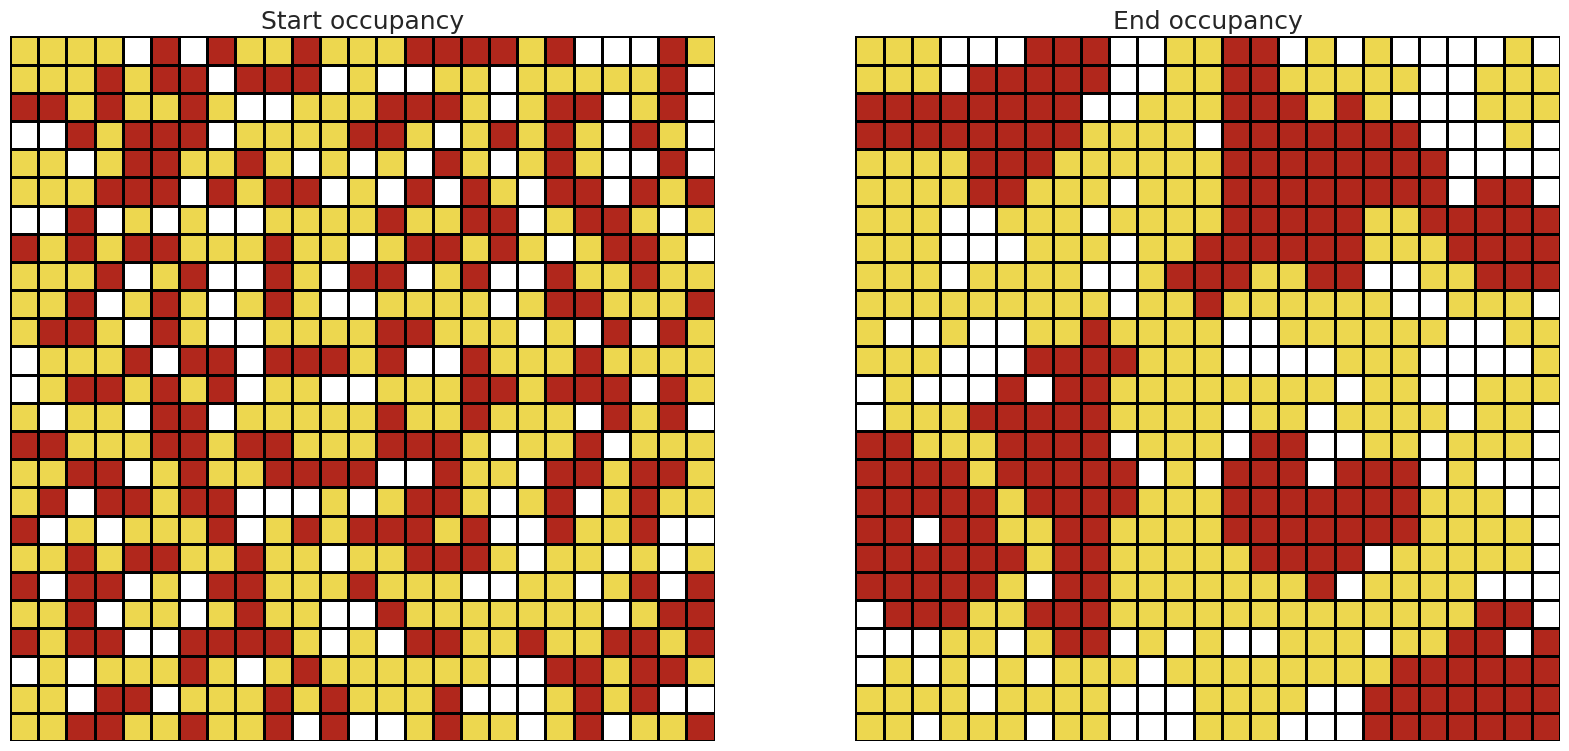

In [109]:
#realize two subplots, one for the start occupancy and one for the end occupancy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title("Start occupancy", fontsize=18)
ax2.set_title("End occupancy", fontsize=18)

#with seaborn realize an heatmap of the occupancy matrix. Divide cells with a white line

yellow = (237, 215, 79)
yellow = tuple([val / 255 for val in yellow])  # Normalize to range [0, 1]

red = (177,39,28)
red = tuple([val / 255 for val in red])  # Normalize to range [0, 1]

colors = ['white', yellow, red]  # Colors for -1, 0, 1 respectively
cmap = ListedColormap(colors)

sns.heatmap(start_occupancy, cmap=cmap, ax=ax1, square=True, cbar=False, linewidths=1, linecolor="black", xticklabels=False, yticklabels=False)
sns.heatmap(end_occupancy,   cmap=cmap, ax=ax2, square=True, cbar=False, linewidths=1, linecolor="black", xticklabels=False, yticklabels=False)

#save the figure in pdf with a tight layout
plt.savefig("plots/occupancy.pdf", bbox_inches='tight')

In [110]:
results_df = pd.read_csv("results.csv")

In [111]:
results_df = results_df[["RunId", "iteration", "Step", "follow_policy", "policy",  "segregation"]]
#calculate the average Step and the average segregation, across different iteration and policy
results_df_g = results_df.groupby(['policy', 'follow_policy']).mean().reset_index()
results_df_g.head(20)

,policy,follow_policy,RunId,iteration,Step,segregation
0,different_neighborhood,0.0,4433.0,49.5,27.48,0.660090
1,different_neighborhood,0.1,4434.0,49.5,100.00,0.658366
2,different_neighborhood,0.2,4435.0,49.5,100.00,0.657778
3,different_neighborhood,0.3,4436.0,49.5,100.00,0.660063
4,different_neighborhood,0.4,4437.0,49.5,100.00,0.662723
5,different_neighborhood,0.5,4438.0,49.5,100.00,0.666901
6,different_neighborhood,0.6,4439.0,49.5,100.00,0.670022
7,different_neighborhood,0.7,4440.0,49.5,100.00,0.673225
8,different_neighborhood,0.8,4441.0,49.5,100.00,0.676101
9,different_neighborhood,0.9,4442.0,49.5,100.00,0.682263


In [112]:
#per each policy, extract the timeseries of Step and segregation
results_df_g_step = results_df_g.pivot(index='follow_policy', columns='policy', values='Step')
results_df_g_segregation = results_df_g.pivot(index='follow_policy', columns='policy', values='segregation')


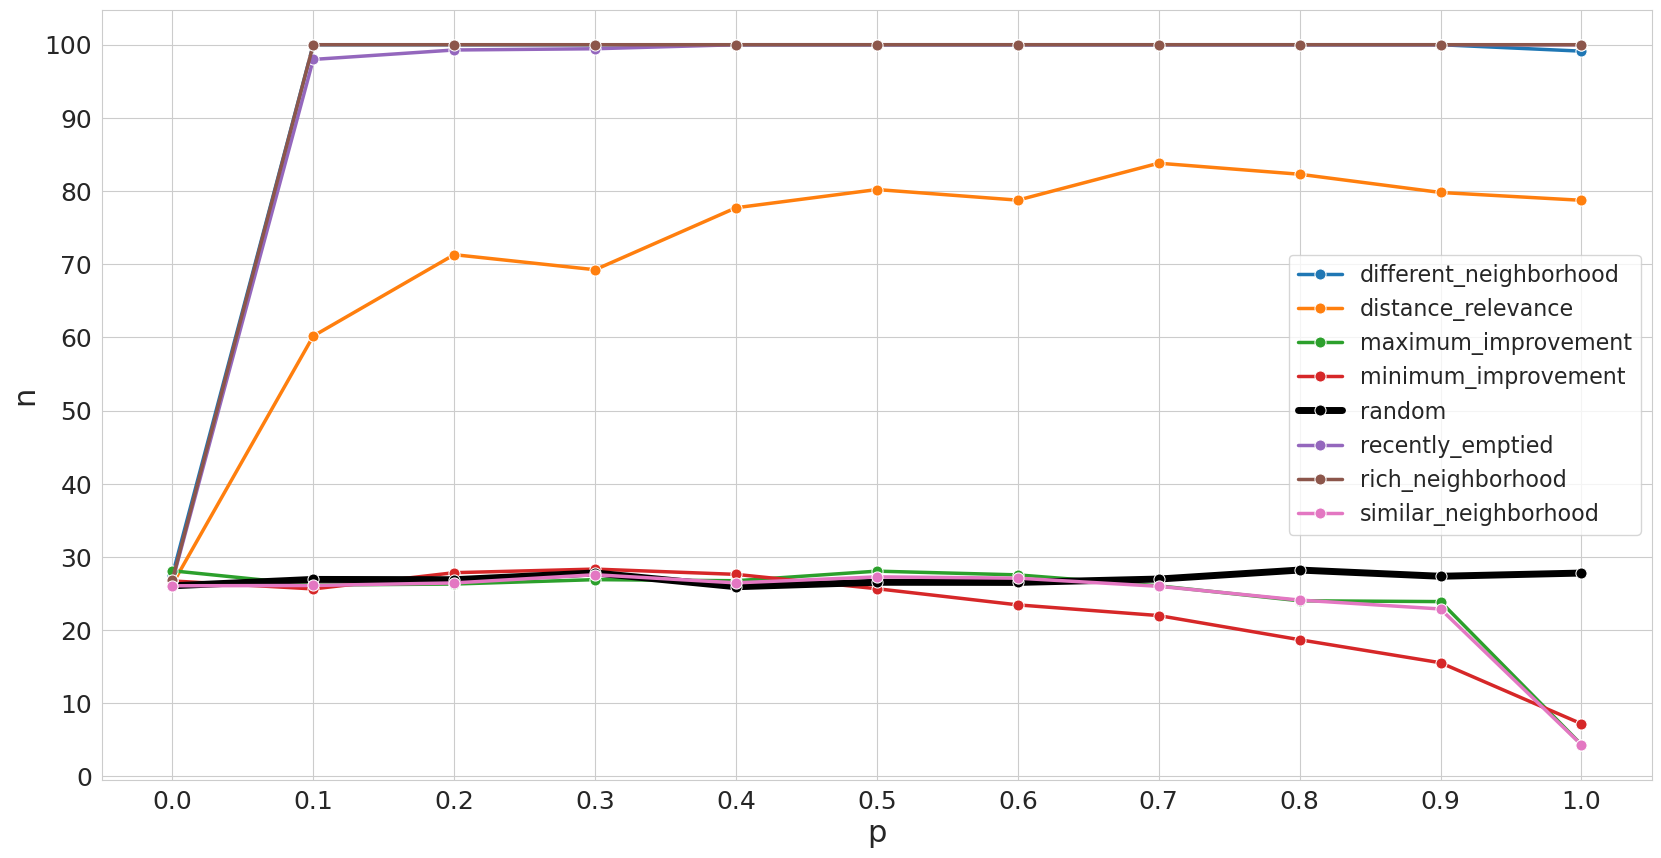

In [113]:
# do the same with a for loo

for policy in results_df_g.policy.unique():
    if policy == 'random':
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label=policy, linewidth=5,
                           marker="o", markersize = 8, dashes=False, color="black")
    else:
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label=policy, linewidth=2.5, marker="o", markersize = 8, dashes=False)
ax.set_xlabel("p", fontsize=22)
ax.set_ylabel("n", fontsize=22)   
ax.tick_params(labelsize=18)
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 100.1, 10))
ax.legend(fontsize=16)



#plt.savefig("plots/average_steps.pdf", bbox_inches='tight')


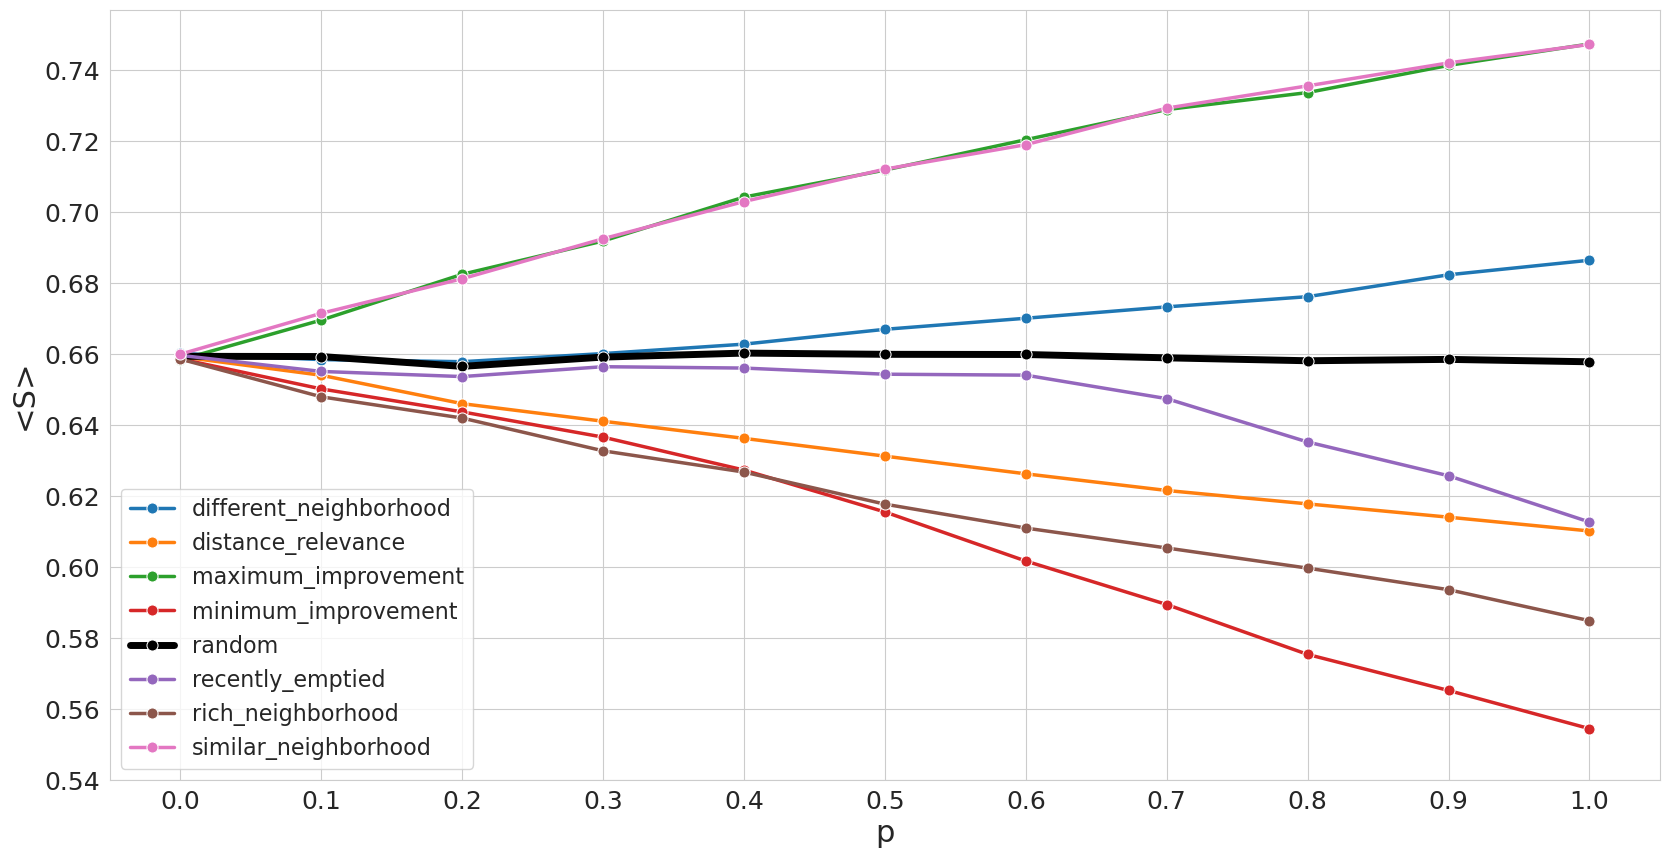

In [114]:
#plot the timeseries of segregation, using seaborn, with grid every 0.1 on x axis and with line and points. The random policy must be thicker than the others as above

for policy in results_df_g.policy.unique():
    if policy == 'random':
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label=policy, linewidth=5, marker="o", markersize = 8, dashes=False, color = "black")
    else:
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label=policy, linewidth=2.5, marker="o", markersize=8, dashes=False)
ax.set_xlabel("p", fontsize=22)
ax.set_ylabel("<S>", fontsize=22)
ax.tick_params(labelsize=18)
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0.54, 0.76, 0.02))
ax.legend(fontsize=16)

plt.savefig("plots/average_segregation.pdf", bbox_inches='tight')